In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import logging
from plotnine import *
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import sys
sys.path.insert(0,'/home/_shared/_projects/nucl_gmx')
from nucl_sys import systems as sys
import pynucl

_ColormakerRegistry()

In [3]:
# logging.basicConfig(level=logging.DEBUG)

In [3]:
p=pynucl.nucltrj(**sys['1kx5_ntm_opc'],time=(0,None,1),fullseqs='1KX5')

/opt/miniconda3/envs/moldyn/lib/python3.7/site-packages/MDAnalysis/analysis/base.py:116: DeprecationWarning: Setting the following kwargs should be done in the run() method: start, step
  DeprecationWarning)


In [10]:
#p.view()

### Distance

In [4]:
d=pynucl.a_geom(p,'dist',('H3 and side1','H4 and side2'))

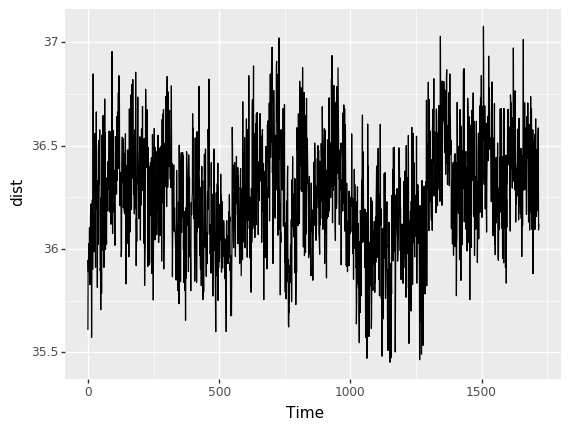

<ggplot: (-9223363280452695829)>

In [6]:

(ggplot(d.df_series,aes(x='Time',y='dist'))+geom_line())

## RMSD

In [13]:
r=pynucl.a_geom(p,'rmsd',('H3 and side1 and alpha2'),rmsd_superposition=False)

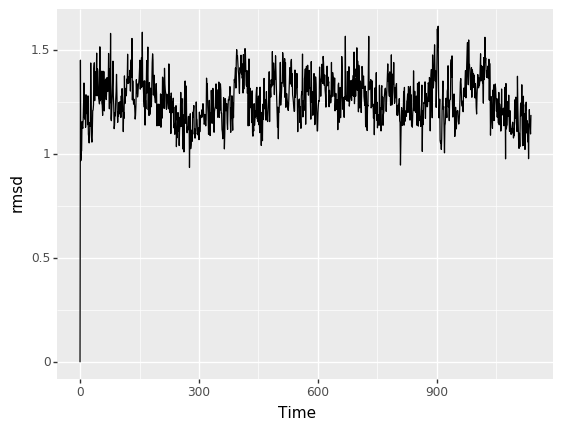

<ggplot: (-9223363302421836733)>

In [14]:
(ggplot(r.df_series,aes(x='Time',y='rmsd'))+geom_line())

In [15]:
rt=pynucl.a_geom(p,'rmsd',('H3 and side1 and alpha2'),rmsd_superposition=True)

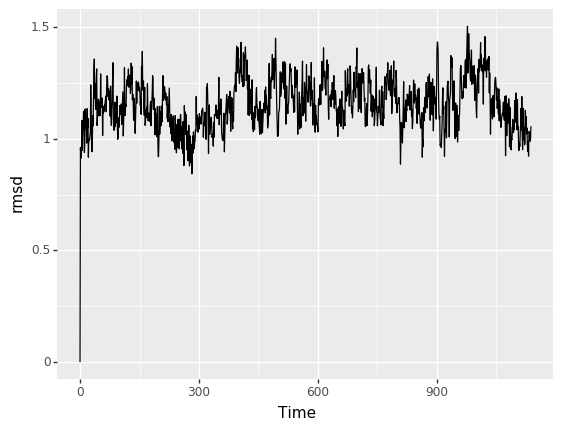

<ggplot: (-9223363302421847548)>

In [16]:
(ggplot(rt.df_series,aes(x='Time',y='rmsd'))+geom_line())

### RMSF

Explanation:
RMSF is root-mean-squared fluctuations of an atom, i.e. standard deviation of atomic positions in the trajectory.
std(d), where d is the deviation.

NOTE: the approach below might not be ideal, since rmsf depends on structure alignment - here we use initial alignment to reference frame.
An alternative way would be to realign them to an average reference frame.


We can calculate coords and sum up stdev of x,y,z

In [17]:
rmsf=pynucl.a_geom(p,'coord',('H3 and side1 and alpha2 and name CA'),rmsd_superposition=False,sel_split='resid')

In [18]:
rmsf.df_std['rmsf']=rmsf.df_std['coord'].apply(np.linalg.norm)

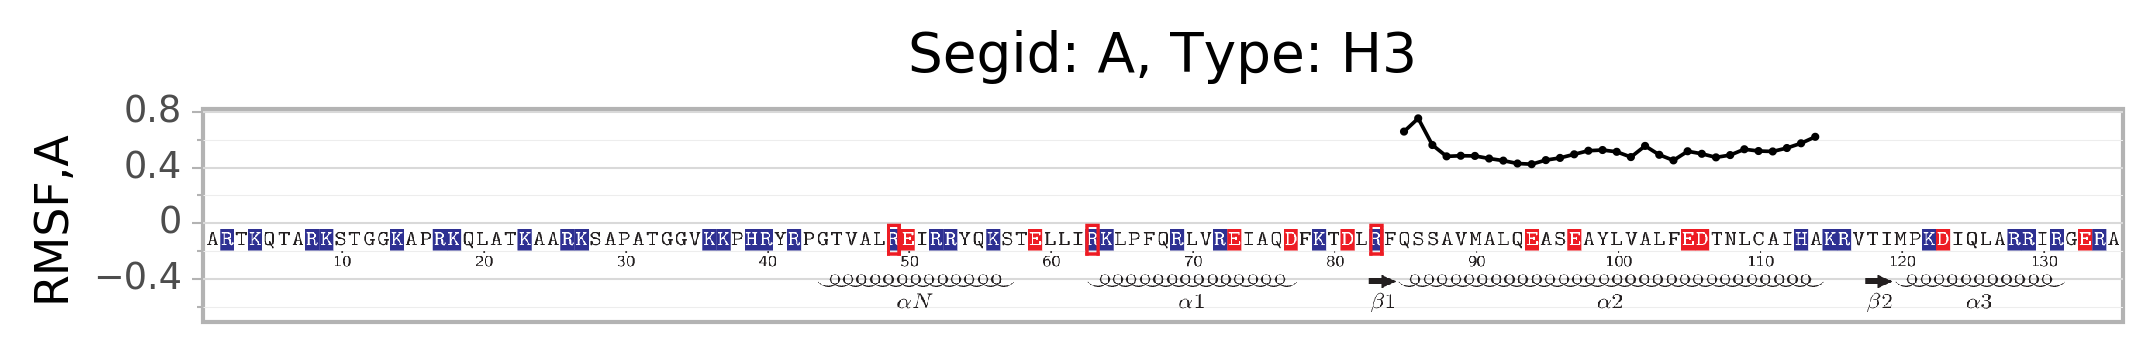

<ggplot: (8734432933461)>

In [19]:
(pynucl.plot_line(rmsf.df_std,p,column='rmsf',dpi=300,debug=False,feature_types=['helix','-->','frameblock'])+ylab('RMSF,A'))

## Vector data, plotting coord

In [5]:
c=pynucl.a_geom(p,'coord',('H3 and alpha2 and name CA'),rmsd_superposition=False,sel_split='atom')

CPU times: user 19.3 s, sys: 195 ms, total: 19.5 s
Wall time: 19.5 s


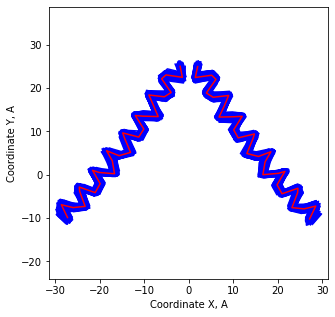

In [7]:
%%time
pynucl.plot_coord(c.df_series,plane='xy',ref=c.df)

CPU times: user 949 ms, sys: 215 ms, total: 1.16 s
Wall time: 916 ms


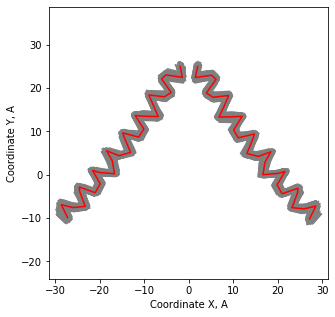

In [10]:
%%time
pynucl.plot_coord_fast(c.df_series,plane='xy',ref=c.df,color='grey')